In [22]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
read_dir_old = r'C:\Users\yl646\Documents\ADHD_research\DATA\OUTPUT\step_6_test\ADHD'
mi_dir_old = r'C:\Users\yl646\Documents\ADHD_research\DATA\OUTPUT\step_6_test\MI_TABLE\mi_adhd.npy'

read_dir_adhd = r'C:\Users\yl646\Documents\ADHD_Research\DATA\OUTPUT\step_6_test_complete\ADHD'
mi_dir_adhd   = r'C:\Users\yl646\Documents\ADHD_Research\DATA\OUTPUT\step_6_test_complete\MI_TABLE\mi_adhd.npy'

read_dir_control = r'C:\Users\yl646\Documents\ADHD_Research\DATA\OUTPUT\step_6_test_complete\CONTROL'
mi_dir_control   = r'C:\Users\yl646\Documents\ADHD_research\DATA\OUTPUT\step_6_test_complete\MI_TABLE\mi_control.npy'

In [4]:
# create ADHD dataset with correct dimension -- OLD METHOD
list_of_ADHD = []
total_epoch = 0
for file in os.listdir(read_dir_old): # for each file (patients)
    df = pd.read_csv(read_dir_old+"\\"+file)
    arr = df.to_numpy()
    num_epoch = arr.shape[0] / 512 # 512 data points in 1 epoch (4 sec x 128 hz)

    if num_epoch < 21: # skip patients with less than 21 epochs
        continue
    num_epoch = 21
    list_of_epoch = []
    
    total_epoch += num_epoch
    for i in range(int(num_epoch)):
        single_epoch = arr[ i*512 : (i+1)*512 , 1: ].transpose() # slice for each epoch. shape: (channel, time)
        list_of_epoch.append(single_epoch)
    
    epochs=np.stack(list_of_epoch) # epoch shape: (epoch, channel, time)
    list_of_ADHD.append(list_of_epoch)

ADHD_dataset_old = np.stack(list_of_ADHD)

print('Total Epoch: ',total_epoch)
print('ADHD dataset dimension: ',ADHD_dataset_old.shape ,' (patient, epoch, channel, time)')

Total Epoch:  903
ADHD dataset dimension:  (43, 21, 20, 512)  (patient, epoch, channel, time)


In [25]:
# create ADHD dataset with correct dimension
list_of_ADHD = []
total_epoch = 0
for i in os.listdir(read_dir_adhd): # for each file (patients)
    df = pd.read_csv(read_dir_adhd+"\\"+i)
    arr = df.to_numpy()
    num_epoch = arr.shape[0] / 512 # 512 data points in 1 epoch (4 sec x 128 hz)

    list_of_epoch = []
    #print(num_epoch)
    total_epoch += num_epoch
    for i in range(int(num_epoch)):
        single_epoch = arr[ i*512 : (i+1)*512 , 1: ].transpose() # slice for each epoch. shape: (channel, time)
        list_of_epoch.append(single_epoch)
    list_of_ADHD.append(list_of_epoch)
all_epoch = []
for patient in list_of_ADHD:
    for epoch in patient:
        all_epoch.append(epoch)
ADHD_dataset = np.stack(all_epoch)

print('Total Epoch: ',total_epoch)
print('ADHD dataset dimension: ',ADHD_dataset.shape, '(epoch, channel, time)')

# create mutual information table 
(epochs, channels, frames) = ADHD_dataset.shape
mi_table = np.zeros([epochs, channels, channels])
for j in range(epochs):
    if j%10==0: 
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("ADHD", j, current_time)
    example = ADHD_dataset[j,:,:]
    for k in range(channels):
        x = np.delete(example,k,axis=0)
        y = example[k,:]
        mi = mutual_info_regression(x.transpose(),y)
        mi = np.insert(mi,k,0)

        mi_table[j,k,:] = mi


# mi_table dimension: (patients, epochs, channel, channel)
np.save(mi_dir_adhd, mi_table)
        
        
        
# create CONTROL dataset with correct dimension
list_of_CONTROL = []
total_epoch = 0
for i in os.listdir(read_dir_control): # for each file (patients)
    df = pd.read_csv(read_dir_control+"\\"+i)
    arr = df.to_numpy()
    num_epoch = arr.shape[0] / 512 # 512 data points in 1 epoch (4 sec x 128 hz)

    #if num_epoch < 21: # skip patients with less than 21 epochs
     #   continue
    #num_epoch = 21
    list_of_epoch = []
    #print(num_epoch)
    total_epoch += num_epoch
    for i in range(int(num_epoch)):
        single_epoch = arr[ i*512 : (i+1)*512 , 1: ].transpose() # slice for each epoch. shape: (channel, time)
        list_of_epoch.append(single_epoch)
    list_of_CONTROL.append(list_of_epoch)

all_epoch = []
for patient in list_of_CONTROL:
    for epoch in patient:
        all_epoch.append(epoch)

CONTROL_dataset = np.stack(all_epoch)

print('Total Epoch: ',total_epoch)
print('CONTROL dataset dimension: ',CONTROL_dataset.shape, '(epoch, channel, time)')

# create mutual information table 
(epochs, channels, frames) = CONTROL_dataset.shape
mi_table = np.zeros([epochs, channels, channels])
for j in range(epochs):
    if j%10==0: 
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("CONTROL", j, current_time)
    example = CONTROL_dataset[j,:,:]
    for k in range(channels):
        x = np.delete(example,k,axis=0)
        y = example[k,:]
        mi = mutual_info_regression(x.transpose(),y)
        mi = np.insert(mi,k,0)

        mi_table[j,k,:] = mi
    
    
# mi_table dimension: (patients, epochs, channel, channel)
np.save(mi_dir_control, mi_table)

Total Epoch:  2231.0
ADHD dataset dimension:  (2231, 20, 512) (epoch, channel, time)
ADHD 0 00:46:33
ADHD 10 00:46:55
ADHD 20 00:47:18
ADHD 30 00:47:39
ADHD 40 00:48:01
ADHD 50 00:48:23
ADHD 60 00:48:45
ADHD 70 00:49:08
ADHD 80 00:49:30
ADHD 90 00:49:52
ADHD 100 00:50:14
ADHD 110 00:50:37
ADHD 120 00:51:00
ADHD 130 00:51:22
ADHD 140 00:51:45
ADHD 150 00:52:07
ADHD 160 00:52:29
ADHD 170 00:52:52
ADHD 180 00:53:14
ADHD 190 00:53:36
ADHD 200 00:53:58
ADHD 210 00:54:20
ADHD 220 00:54:42
ADHD 230 00:55:04
ADHD 240 00:55:26
ADHD 250 00:55:48
ADHD 260 00:56:10
ADHD 270 00:56:32
ADHD 280 00:56:54
ADHD 290 00:57:16
ADHD 300 00:57:38
ADHD 310 00:58:00
ADHD 320 00:58:22
ADHD 330 00:58:44
ADHD 340 00:59:06
ADHD 350 00:59:30
ADHD 360 00:59:54
ADHD 370 01:00:18
ADHD 380 01:00:41
ADHD 390 01:01:07
ADHD 400 01:01:32
ADHD 410 01:01:58
ADHD 420 01:02:24
ADHD 430 01:02:48
ADHD 440 01:03:11
ADHD 450 01:03:33
ADHD 460 01:03:56
ADHD 470 01:04:21
ADHD 480 01:04:45
ADHD 490 01:05:10
ADHD 500 01:05:34
ADHD 510

(2231, 20, 20)


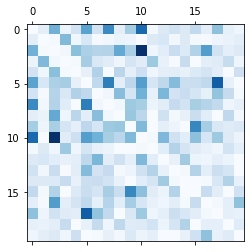

In [31]:
%matplotlib inline
a= np.load(mi_dir_adhd)
print(a.shape)
fig, ax = plt.subplots()
ax.matshow(a[150,:,:], cmap=plt.cm.Blues)

(1757, 20, 20)


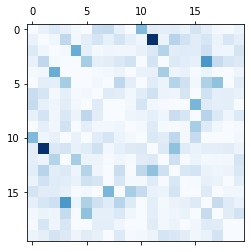

In [30]:
a= np.load(mi_dir_control)
print(a.shape)
fig, ax = plt.subplots()
ax.matshow(a[150,:,:], cmap=plt.cm.Blues)